In [41]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
# using colors from matplotlib default color cycle
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Legacy Catalogs

* JM sent a match between Virgo v1 catalogs and Legacy DR9 on 1/29/21
* the catalogs are split into North and South, which is a designation relative to the Legacy Survey, vs one based on declination

In [100]:
legtabledir = '/home/rfinn/research/Virgo/tables-moustakas/'
legnorth = Table.read(legtabledir+'vf_north_v1_main_dr9north.fits')
legsouth = Table.read(legtabledir+'vf_north_v1_main_dr9south.fits')

## Matching Statistics

In [101]:
northflag = (legnorth['BRICKID'] > 0) & (legnorth['TYPE'] != 'DUP')
southflag = (legsouth['BRICKID'] > 0) & (legsouth['TYPE'] != 'DUP')

In [102]:
onematch = (northflag | southflag)
print('number with at least one match = {:d}/{:d} ({:.1f}%)'.format(sum(onematch),len(onematch),sum(onematch)/len(onematch)*100))

number with at least one match = 6714/6797 (98.8%)


In [103]:
print('number in both catalogs = ',sum(northflag & southflag))
bothflag = northflag & southflag

number in both catalogs =  392


In [104]:
nduplicateflag = legnorth['TYPE'] == 'DUP'
sduplicateflag = legsouth['TYPE'] == 'DUP'
print(sum(nduplicateflag & sduplicateflag))

0


In [106]:
# write out table with no matches

v.main[~onematch].write(legtabledir+'vf_north_v1_main_dr9_nomatch.fits',format='fits',overwrite=True)

# Objects that are in both N and S Catalogs

In [107]:
# compare fluxes
bands = ['G','R','Z']
bands = ['W1','W2','W3','W4']
colnames = ['FLUX_{}'.format(b) for b in bands]
print(colnames)

['FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4']


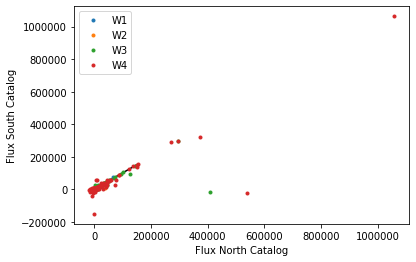

In [109]:
# print flux
plt.figure()
xl = np.linspace(0,150000,20)
plt.plot(xl,xl,'k-')
for i,c in enumerate(colnames):
    plt.plot(legnorth[c][bothflag],legsouth[c][bothflag],'b.',color=mycolors[i],label=bands[i])
    plt.xlabel('Flux North Catalog')
    plt.ylabel('Flux South Catalog')
plt.legend()
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')


# Read in Virgo Tables

In [8]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'

In [9]:
%run ~/github/Virgo/programs/readtables.py

# Look at the Spatial Distribution

Text(0.5, 1.0, 'Legacy Survey Photometry of Virgo Filament Galaxies')

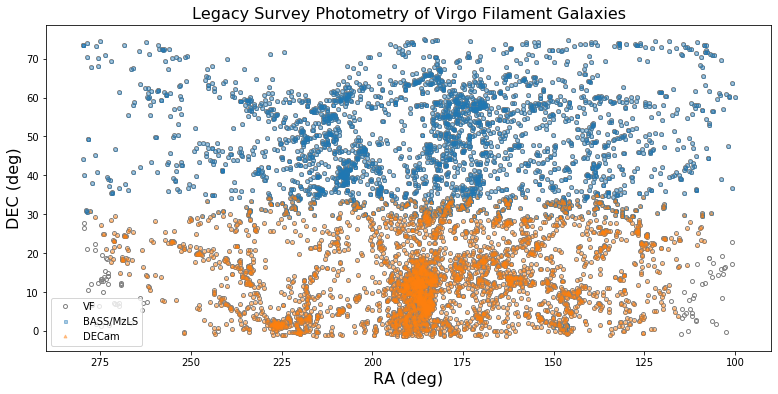

In [110]:
plt.figure(figsize=(13,6))
cats = [v.main,legnorth,legsouth]
labels = ['VF','BASS/MzLS','DECam']
symbols = ['o','s','^']
markersizes = [4,3,3]
alphas = [1,.4,.4]
mfcs = ['None',mycolors[0],mycolors[1]]
colors = ['0.5',mycolors[0],mycolors[1]]
for i,c in enumerate(cats):
    plt.plot(c['RA'],c['DEC'],'k.',marker=symbols[i],color=colors[i],markersize=markersizes[i],mfc=mfcs[i],alpha=alphas[i],label=labels[i])
plt.xlim(90,290)
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.legend()#loc='lower right')
plt.gca().invert_xaxis()
plt.title('Legacy Survey Photometry of Virgo Filament Galaxies',fontsize=16)

In [ ]:
plt.figure(figsize=(13,6))
cats = [v.main,legnorth,legsouth]
labels = ['VF','BASS/MzLS','DECam']
symbols = ['o','s','^']
markersizes = [4,3,3]
alphas = [1,.4,.4]
mfcs = ['None',mycolors[0],mycolors[1]]
colors = ['0.5',mycolors[0],mycolors[1]]
for i,c in enumerate(cats):
    plt.plot(c['RA'],c['DEC'],'k.',marker=symbols[i],color=colors[i],markersize=markersizes[i],mfc=mfcs[i],alpha=alphas[i],label=labels[i])
plt.xlim(90,290)
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.legend()#loc='lower right')
plt.gca().invert_xaxis()
plt.title('Legacy Survey Photometry of Virgo Filament Galaxies',fontsize=16)


In [111]:
v.main[~onematch]

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes38,bytes8
VFID3115,279.48042599999997,27.793224,3145.0,36.738487,True,UGC11307,0,0,0,UGC 11307,True,False,False,False,False,False,False,True,True,False,VFID3115-UGC11307,VFID3115
VFID3206,279.3589815,26.4170734,3205.4,41.698578,True,NGC6671,0,0,0,NGC 6671,True,False,False,False,False,False,False,True,False,False,VFID3206-NGC6671,VFID3206
VFID3468,100.7854545,22.8738922,1294.9,30.069157,True,UGC03516,0,0,0,UGC 03516,True,False,False,False,False,False,False,True,False,False,VFID3468-UGC03516,VFID3468
VFID3516,276.4101045,22.3273564,3133.5,27.804895,True,UGC11229,634748,148423,0,UGC 11229,True,True,True,False,False,False,False,True,False,True,VFID3516-UGC11229,VFID3516
VFID3613,278.513577,21.1316744,3061.0,19.866495,True,PGC166546,634762,148437,0,2MFGC 14475,True,True,True,False,False,False,False,True,False,True,VFID3613-2MFGC14475,VFID3613
VFID3627,276.315474,20.9130018,3203.0,30.138474,True,PGC061855,634747,148422,0,CGCG 114-006,True,True,True,False,False,False,False,True,False,True,VFID3627-CGCG114-006,VFID3627
VFID3747,274.38440549999996,19.44465,2951.0,24.553944,True,PGC061689,0,0,0,CGCG 113-034,True,False,False,False,False,False,False,True,False,False,VFID3747-CGCG113-034,VFID3747
VFID3762,103.478541,19.2996389,1266.6,67.16164,True,UGC03587,0,0,0,UGC 03587,True,False,False,False,False,False,False,True,True,False,VFID3762-UGC03587,VFID3762


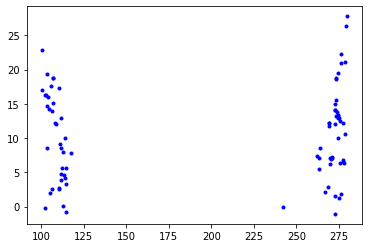

In [112]:
plt.plot(v.main['RA'][~onematch],v.main['DEC'][~onematch],'b.')

In [115]:
sum(~onematch & v.main['A100flag'])

11

* keep unmatched in catalog, but have legacy flag
* show CO